In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [2]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [3]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_GLD.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

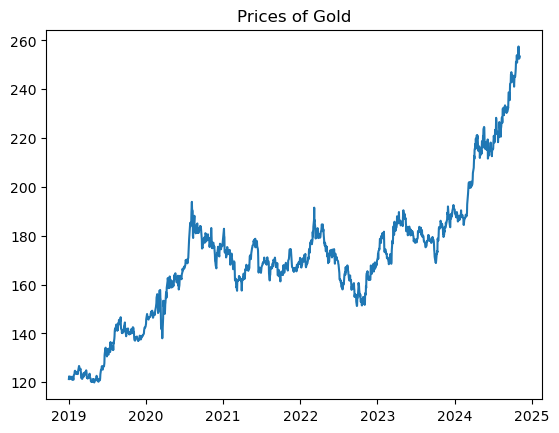

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [128]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [129]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [130]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [131]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10334, saving model to save_model_7_2_1.keras
19/19 - 4s - 213ms/step - loss: 0.1033
Epoch 2/80

Epoch 2: loss improved from 0.10334 to 0.03546, saving model to save_model_7_2_1.keras
19/19 - 1s - 58ms/step - loss: 0.0355
Epoch 3/80

Epoch 3: loss improved from 0.03546 to 0.02498, saving model to save_model_7_2_1.keras
19/19 - 1s - 56ms/step - loss: 0.0250
Epoch 4/80

Epoch 4: loss did not improve from 0.02498
19/19 - 1s - 52ms/step - loss: 0.0253
Epoch 5/80

Epoch 5: loss improved from 0.02498 to 0.02429, saving model to save_model_7_2_1.keras
19/19 - 1s - 51ms/step - loss: 0.0243
Epoch 6/80

Epoch 6: loss improved from 0.02429 to 0.02369, saving model to save_model_7_2_1.keras
19/19 - 1s - 51ms/step - loss: 0.0237
Epoch 7/80

Epoch 7: loss did not improve from 0.02369
19/19 - 1s - 50ms/step - loss: 0.0240
Epoch 8/80

Epoch 8: loss improved from 0.02369 to 0.02241, saving model to save_model_7_2_1.keras
19/19 - 1s - 54ms/step - loss: 0.0224
Epoch 

In [132]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [133]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [134]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [135]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [136]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.923836886882782], [0.8386529684066772], [0.7774225473403931], [0.7426281571388245], [0.7190098166465759], [0.700310468673706], [0.6830296516418457], [0.6665847897529602], [0.6517446637153625], [0.6392118334770203], [0.6291708946228027], [0.6213268637657166], [0.6151240468025208], [0.609956681728363], [0.6053004264831543], [0.6007662415504456], [0.5960978269577026], [0.5911462903022766], [0.5858386158943176], [0.580150842666626], [0.5740910172462463], [0.5676893591880798], [0.5609911680221558], [0.5540540814399719], [0.5469430685043335], [0.5397265553474426], [0.5324727296829224], [0.5252453088760376], [0.5181007981300354], [0.5110868811607361]]


In [137]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [138]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[247.02300234]
 [235.30510272]
 [226.88224615]
 [222.09592991]
 [218.84699105]
 [216.27470879]
 [213.89755964]
 [211.63540448]
 [209.59399678]
 [207.86998068]
 [206.48874915]
 [205.40972429]
 [204.5564648 ]
 [203.84564207]
 [203.20512761]
 [202.58140515]
 [201.93921805]
 [201.25808468]
 [200.527961  ]
 [199.74555092]
 [198.91196135]
 [198.03134929]
 [197.10994613]
 [196.15568051]
 [195.17748959]
 [194.18478606]
 [193.18694982]
 [192.19274583]
 [191.20994695]
 [190.24511255]]


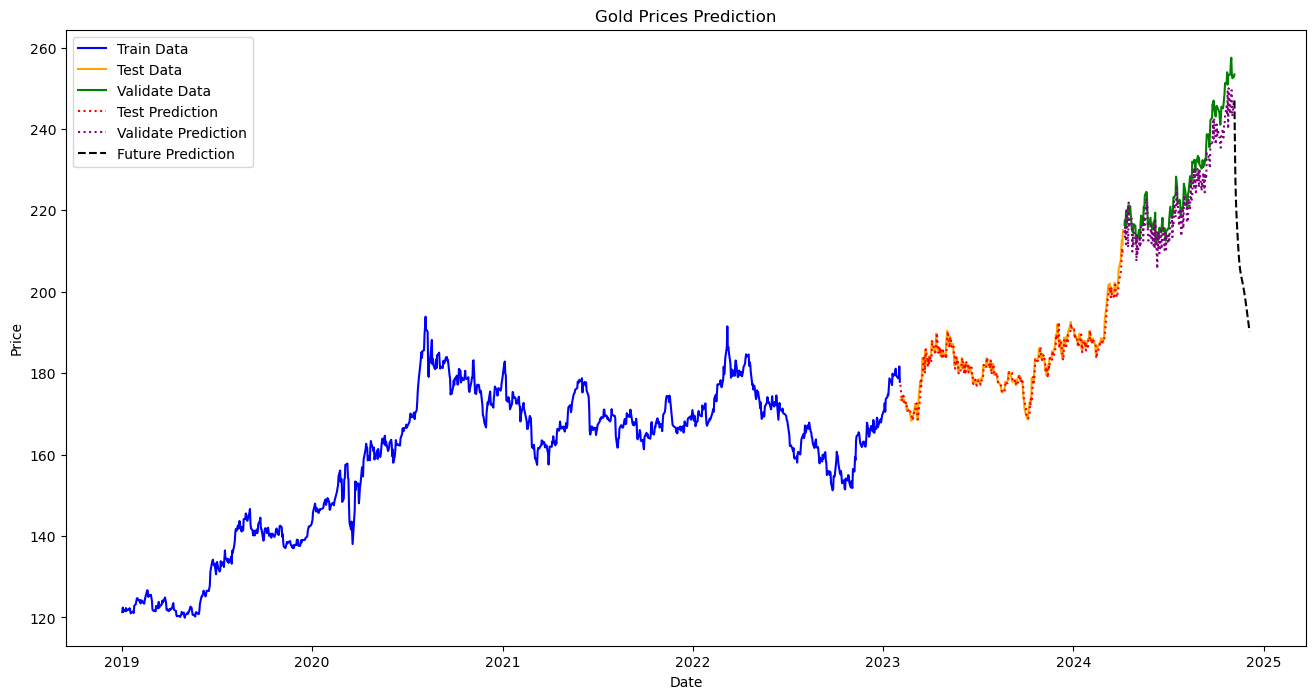

In [139]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [18]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.5288116032027266
MAPE:  0.8203764132448617
RMSE:  1.9966176567686127

** Validate **
MAE:  6.410932283566038
MAPE:  2.7706350636918913
RMSE:  7.119218715698898


# Split dataset (6-3-1)

---



In [103]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [104]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [105]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [106]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11632, saving model to save_model_6_3_1.keras
16/16 - 4s - 242ms/step - loss: 0.1163
Epoch 2/80

Epoch 2: loss improved from 0.11632 to 0.03469, saving model to save_model_6_3_1.keras
16/16 - 1s - 53ms/step - loss: 0.0347
Epoch 3/80

Epoch 3: loss improved from 0.03469 to 0.02432, saving model to save_model_6_3_1.keras
16/16 - 1s - 53ms/step - loss: 0.0243
Epoch 4/80

Epoch 4: loss improved from 0.02432 to 0.02305, saving model to save_model_6_3_1.keras
16/16 - 1s - 54ms/step - loss: 0.0231
Epoch 5/80

Epoch 5: loss improved from 0.02305 to 0.02236, saving model to save_model_6_3_1.keras
16/16 - 1s - 61ms/step - loss: 0.0224
Epoch 6/80

Epoch 6: loss did not improve from 0.02236
16/16 - 1s - 61ms/step - loss: 0.0283
Epoch 7/80

Epoch 7: loss did not improve from 0.02236
16/16 - 1s - 56ms/step - loss: 0.0251
Epoch 8/80

Epoch 8: loss improved from 0.02236 to 0.02221, saving model to save_model_6_3_1.keras
16/16 - 1s - 56ms/step - loss: 0.0222
Epoch 

In [107]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [108]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [109]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [110]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [111]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9247900247573853], [0.8427432775497437], [0.7791500687599182], [0.748009979724884], [0.7290880680084229], [0.7033533453941345], [0.668049156665802], [0.6304534673690796], [0.5974838733673096], [0.5712351202964783], [0.5504583120346069], [0.5333741307258606], [0.5190286636352539], [0.5072627663612366], [0.4982263147830963], [0.4920103847980499], [0.4885222613811493], [0.48751723766326904], [0.4886796176433563], [0.49168941378593445], [0.49625664949417114], [0.5021302700042725], [0.5090914964675903], [0.5169429183006287], [0.5254985690116882], [0.5345792174339294], [0.5440099835395813], [0.5536215901374817], [0.5632531046867371], [0.5727536678314209]]


In [112]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [113]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[247.15411599]
 [235.86776564]
 [227.11988399]
 [222.83625342]
 [220.23335529]
 [216.6932869 ]
 [211.83684279]
 [206.66517986]
 [202.12988259]
 [198.51910418]
 [195.66104648]
 [193.31094654]
 [191.33758412]
 [189.71906732]
 [188.47601307]
 [187.62094975]
 [187.1411235 ]
 [187.00287244]
 [187.16276943]
 [187.57679698]
 [188.20506591]
 [189.01304114]
 [189.97062743]
 [191.050669  ]
 [192.22758429]
 [193.47671827]
 [194.77401443]
 [196.09618701]
 [197.42109813]
 [198.72799557]]


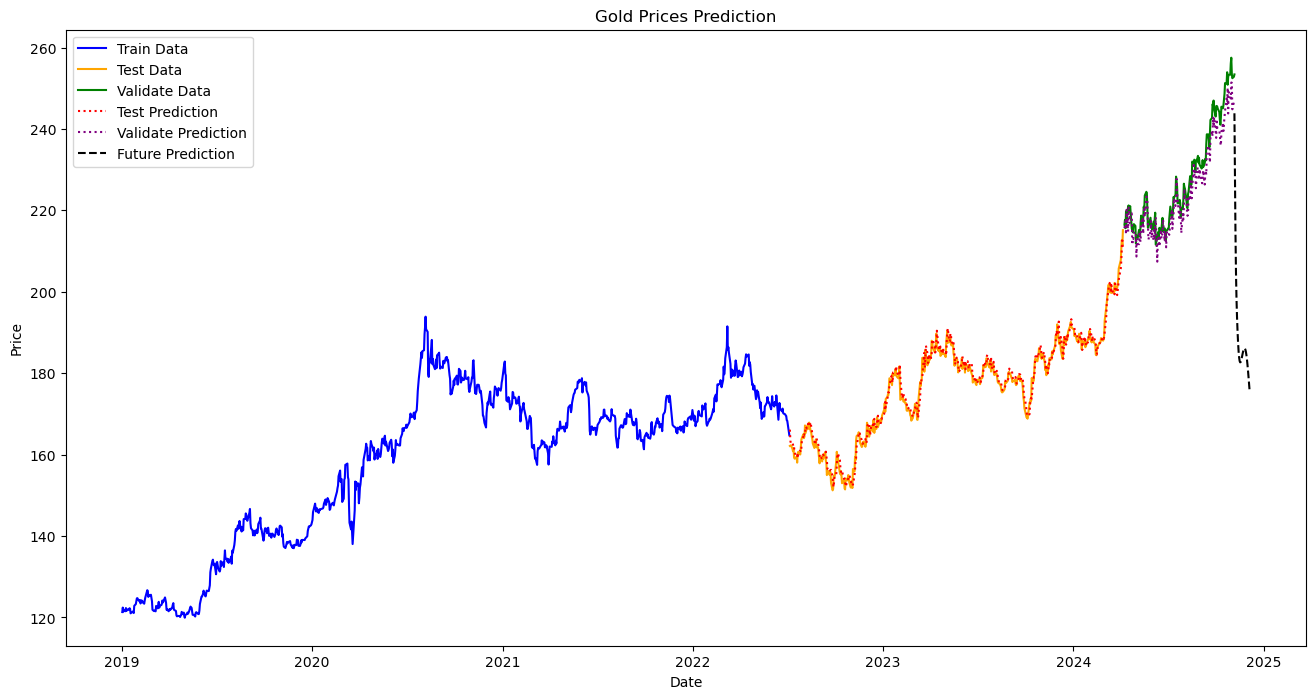

In [86]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [30]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.239183040869473
MAPE:  0.7042987710266725
RMSE:  1.6182963637195127

** Validate **
MAE:  3.1446153812209676
MAPE:  1.362411715547362
RMSE:  3.8625132670688913


# Split dataset (5-3-2)

---



In [140]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [141]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [142]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [143]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.12110, saving model to save_model_5_3_2.keras
13/13 - 4s - 288ms/step - loss: 0.1211
Epoch 2/80

Epoch 2: loss improved from 0.12110 to 0.03941, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0394
Epoch 3/80

Epoch 3: loss improved from 0.03941 to 0.02684, saving model to save_model_5_3_2.keras
13/13 - 1s - 53ms/step - loss: 0.0268
Epoch 4/80

Epoch 4: loss improved from 0.02684 to 0.02333, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0233
Epoch 5/80

Epoch 5: loss improved from 0.02333 to 0.02302, saving model to save_model_5_3_2.keras
13/13 - 1s - 57ms/step - loss: 0.0230
Epoch 6/80

Epoch 6: loss did not improve from 0.02302
13/13 - 1s - 63ms/step - loss: 0.0247
Epoch 7/80

Epoch 7: loss improved from 0.02302 to 0.02161, saving model to save_model_5_3_2.keras
13/13 - 1s - 59ms/step - loss: 0.0216
Epoch 8/80

Epoch 8: loss improved from 0.02161 to 0.02107, saving model to save_model_5_3_2.keras


In [144]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [145]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [146]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [147]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [148]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8947055339813232], [0.7976626753807068], [0.6823903918266296], [0.5979984402656555], [0.549106240272522], [0.5207740068435669], [0.49808475375175476], [0.47425377368927], [0.450283020734787], [0.4306583106517792], [0.41905397176742554], [0.41635918617248535], [0.42103469371795654], [0.43043452501296997], [0.44196006655693054], [0.4536902606487274], [0.4645634591579437], [0.47425714135169983], [0.48288580775260925], [0.49063944816589355], [0.4975045621395111], [0.503169059753418], [0.5071235299110413], [0.5088763236999512], [0.5081591606140137], [0.5050284266471863], [0.49983152747154236], [0.4930800199508667], [0.4853072464466095], [0.47696948051452637]]


In [149]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [150]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[243.01569351]
 [229.66647811]
 [213.80962306]
 [202.20066641]
 [195.47505549]
 [191.57767353]
 [188.45653993]
 [185.17835037]
 [181.88093365]
 [179.18135858]
 [177.58506575]
 [177.21437105]
 [177.85753386]
 [179.15057463]
 [180.73602809]
 [182.34963357]
 [183.84535073]
 [185.17881363]
 [186.36577296]
 [187.43236371]
 [188.37672877]
 [189.15593705]
 [189.69991396]
 [189.94102827]
 [189.84237531]
 [189.41171156]
 [188.69682612]
 [187.76808876]
 [186.69886606]
 [185.55192299]]


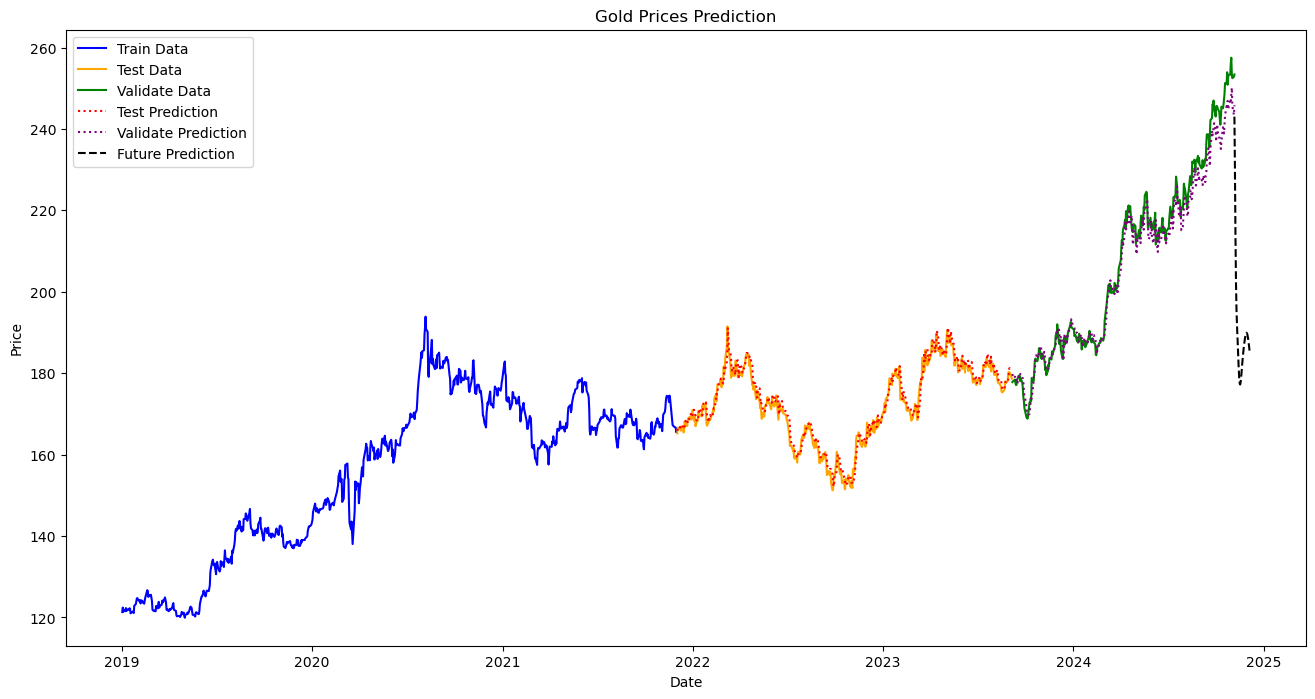

In [151]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [42]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.3511925183345737
MAPE:  0.7814230235020286
RMSE:  1.7422348412575328

** Validate **
MAE:  2.7956414694319394
MAPE:  1.283501662976771
RMSE:  3.5892675380897496
